# **Data Acquisition For Evaly's Dataset**

**Importing the Necessary Libraries**

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL

#**Evaly’s Total Profit After 3 Years Using Statistical Analysis**

**Loading Evaly Dataset**

In [238]:
# Data loading
evaly_data = pd.read_csv("products.csv")

**Printing The first 5 and last rows of the Evaly Dataset**

In [239]:
# Display the first 5 and last 5 rows of the DataFrame
pd.concat([evaly_data.head(5), evaly_data.tail(5)])

,name,offer_price,regular_price
0,Aprilia FX-150 150 CC Motorbike,129150,215250
1,Runner UM XTREET 150CC Motorbike,103800,173000
2,RUNNER BOLT 165CC Motorbike,101400,169000
3,RUNNER KNIGHT-RIDER- V2 150CC Motorbike,99600,166000
4,RUNNER KNIGHT-RIDER 150CC Motorbike,93600,156000
57,MIBK Open Full Face 603 Helmet Black,575,1150
58,awei Car Charger C707 White or Black,325,650
59,"SUZUKI PRINTED WIND BREAKER, MONSTAR PRINTED P...",1750,2500
60,"PULSAR PRINTED WIND BREAKER, PULSAR PRINTED PO...",1750,2500
61,"ENEOS PRINTED WIND BREAKER, YAMAHA PRINTED POL...",1750,2500


**Ploting the Evaly's profit per unit**

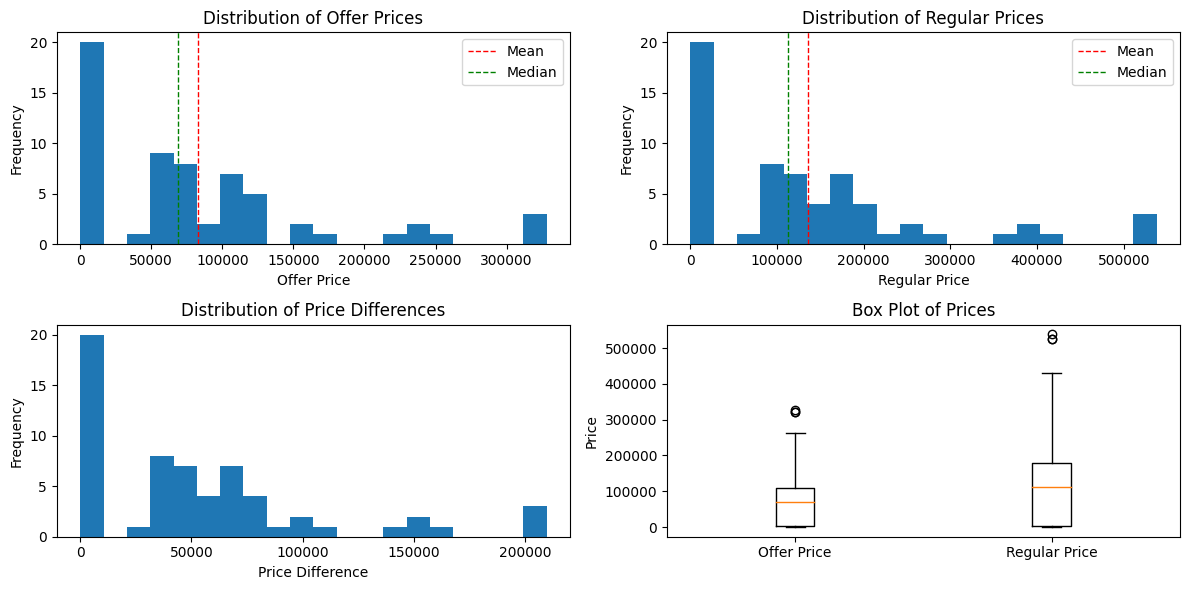

In [240]:
# Convert price columns to numeric
evaly_data['offer_price'] = pd.to_numeric(evaly_data['offer_price'])
evaly_data['regular_price'] = pd.to_numeric(evaly_data['regular_price'])

# Calculate mean and median offer prices
mean_offer_price = evaly_data['offer_price'].mean()
median_offer_price = evaly_data['offer_price'].median()

# Calculate mean and median regular prices
mean_regular_price = evaly_data['regular_price'].mean()
median_regular_price = evaly_data['regular_price'].median()

# Calculate price differences
evaly_data['price_difference'] = evaly_data['regular_price'] - evaly_data['offer_price']

# Visualize distributions
plt.figure(figsize=(12, 6))

# Offer prices
plt.subplot(2, 2, 1)
plt.hist(evaly_data['offer_price'], bins=20)
plt.axvline(mean_offer_price, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_offer_price, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.xlabel('Offer Price')
plt.ylabel('Frequency')
plt.title('Distribution of Offer Prices')
plt.legend()

# Regular prices
plt.subplot(2, 2, 2)
plt.hist(evaly_data['regular_price'], bins=20)
plt.axvline(mean_regular_price, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(median_regular_price, color='g', linestyle='dashed', linewidth=1, label='Median')
plt.xlabel('Regular Price')
plt.ylabel('Frequency')
plt.title('Distribution of Regular Prices')
plt.legend()

# Price differences
plt.subplot(2, 2, 3)
plt.hist(evaly_data['price_difference'], bins=20)
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Price Differences')

# Box plot
plt.subplot(2, 2, 4)
plt.boxplot([evaly_data['offer_price'], evaly_data['regular_price']], labels=['Offer Price', 'Regular Price'])
plt.ylabel('Price')
plt.title('Box Plot of Prices')

plt.tight_layout()
plt.show()

**Calculating Revenue, Profit, Cost, and Total Orders for Evaly Over 3 Years**

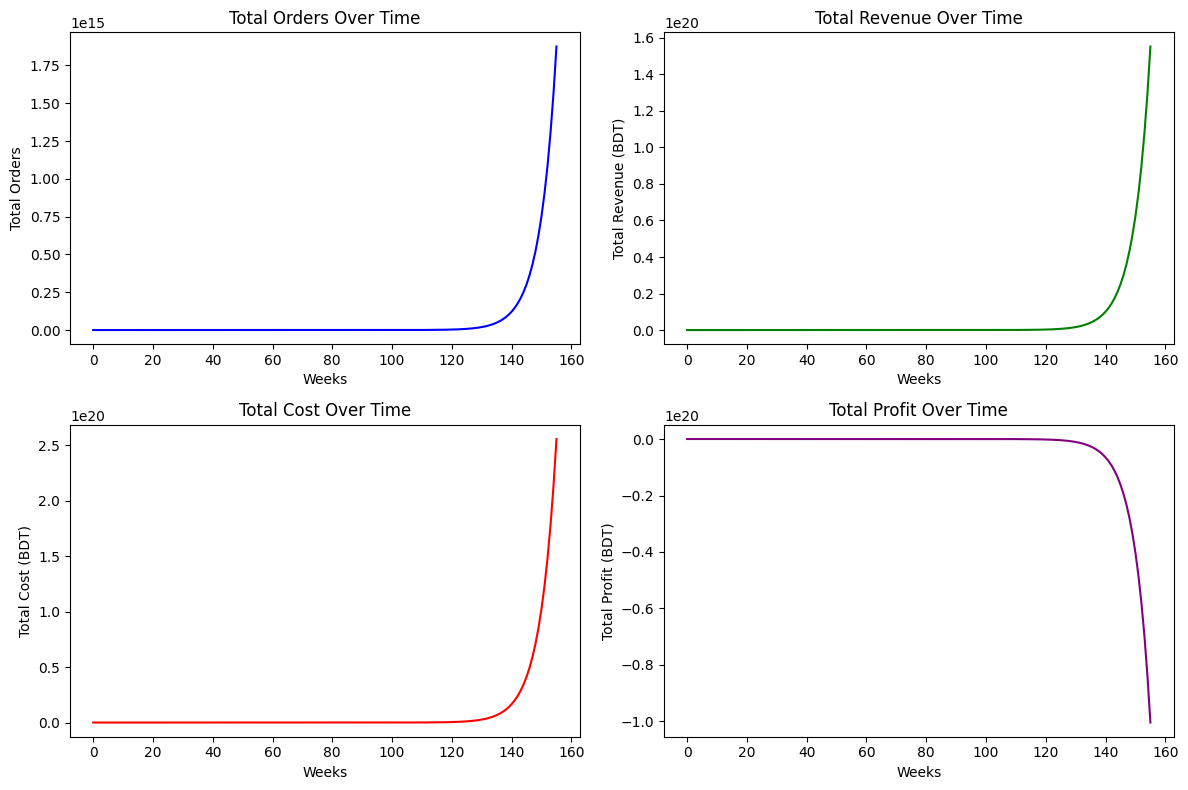

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

# Data loading: Read the dataset from a CSV file
evaly_data = pd.read_csv("products.csv")

# Convert columns to numeric: Ensure that 'offer_price' and 'regular_price' are in numeric format for calculations
evaly_data['offer_price'] = pd.to_numeric(evaly_data['offer_price'], errors='coerce')
evaly_data['regular_price'] = pd.to_numeric(evaly_data['regular_price'], errors='coerce')

# Parameters for calculations
initial_orders = 1000   # Initial number of orders
growth_rate = 0.20      # Weekly growth rate of orders
weeks = 156             # Total number of weeks in 3 years

# Calculate the total number of orders over the 3-year period using the geometric series formula
total_orders = initial_orders * ((1 + growth_rate) ** weeks - 1) / growth_rate

# Calculate revenue and cost for each product
evaly_data['revenue'] = evaly_data['offer_price'] * total_orders
evaly_data['cost'] = evaly_data['regular_price'] * total_orders

# Calculate the total revenue and cost across all products
total_revenue = evaly_data['revenue'].sum()
total_cost = evaly_data['cost'].sum()

# Calculate total profit by subtracting total cost from total revenue
total_profit = total_revenue - total_cost

# Calculate and plot metrics over time
weeks_range = range(weeks)
orders_over_time = [initial_orders * ((1 + growth_rate) ** week) for week in weeks_range]
revenue_over_time = [evaly_data['offer_price'].mean() * orders for orders in orders_over_time]
cost_over_time = [evaly_data['regular_price'].mean() * orders for orders in orders_over_time]
profit_over_time = [revenue - cost for revenue, cost in zip(revenue_over_time, cost_over_time)]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(weeks_range, orders_over_time, color='blue')
plt.title('Total Orders Over Time')
plt.xlabel('Weeks')
plt.ylabel('Total Orders')

plt.subplot(2, 2, 2)
plt.plot(weeks_range, revenue_over_time, color='green')
plt.title('Total Revenue Over Time')
plt.xlabel('Weeks')
plt.ylabel('Total Revenue (BDT)')

plt.subplot(2, 2, 3)
plt.plot(weeks_range, cost_over_time, color='red')
plt.title('Total Cost Over Time')
plt.xlabel('Weeks')
plt.ylabel('Total Cost (BDT)')

plt.subplot(2, 2, 4)
plt.plot(weeks_range, profit_over_time, color='purple')
plt.title('Total Profit Over Time')
plt.xlabel('Weeks')
plt.ylabel('Total Profit (BDT)')

plt.tight_layout()
plt.show()

**Printing the Revenue, Cost, and Profit for Evaly’s Dataset**

In [242]:
# Print the final results
print(f"Total Orders after 3 years: {total_orders:.0f}")
print(f"Total Revenue: {total_revenue:,.2f} BDT")
print(f"Total Cost: {total_cost:,.2f} BDT")
print(f"Total Profit: {total_profit:,.2f} BDT")

Total Orders after 3 years: 11252379938458032
Total Revenue: 57,767,231,828,077,137,887,232.00 BDT
Total Cost: 95,109,672,453,722,374,930,432.00 BDT
Total Profit: -37,342,440,625,645,237,043,200.00 BDT


# **Data Acquisition For NVDA Dataset**





In [243]:
# Data loading
df = pd.read_csv("NVDA.csv")

In [244]:
# Display the first 5 and last 5 rows of the DataFrame
pd.concat([df.head(5), df.tail(5)])

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900
6115,2024-04-24,839.500000,840.820007,791.830017,796.770020,796.770020,50961600


<Axes: xlabel='Date', ylabel='Close'>

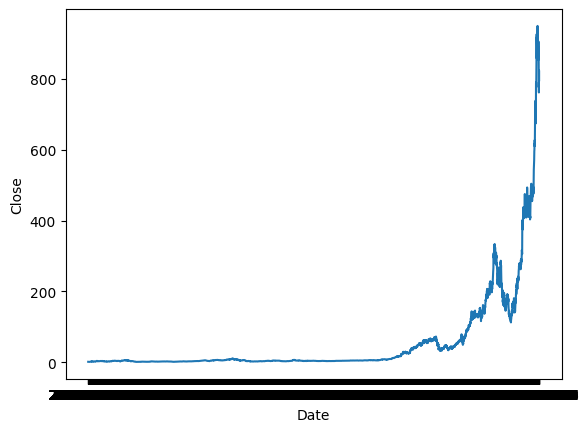

In [245]:
sns.lineplot(x='Date', y='Close', data=df)

In [246]:
df['mean'] = df['Close'].rolling(window=365).mean()
df['std_dev'] = df['Close'].rolling(window=365).std()

<Axes: xlabel='Date', ylabel='mean'>

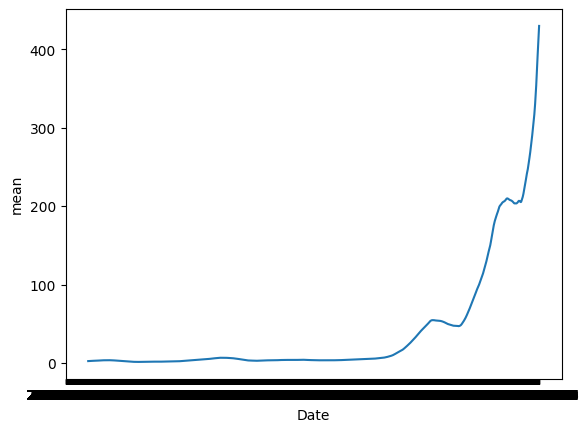

In [247]:
sns.lineplot(x='Date', y='mean', data=df)

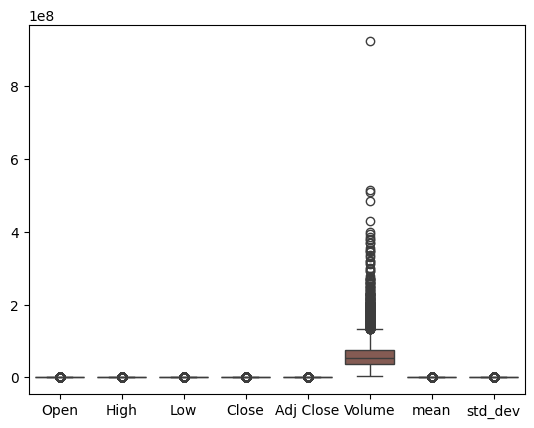

In [248]:
#  Plot a boxplot for each feature
sns.boxplot(data=df)
plt.show()

<Axes: xlabel='Date', ylabel='std_dev'>

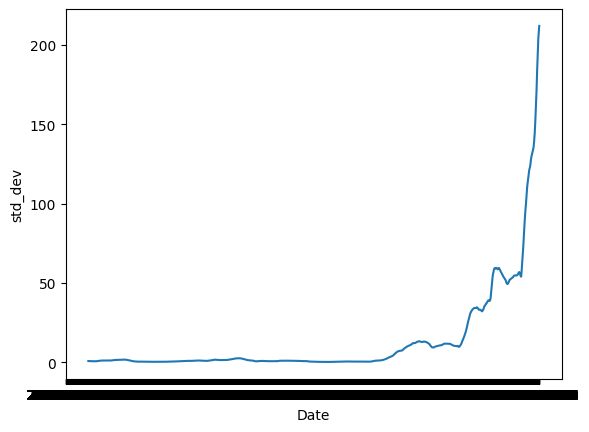

In [249]:
sns.lineplot(x='Date', y='std_dev', data=df)

**Check for missing value**

In [250]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
mean,364
std_dev,364


In [251]:
# Feature Engineering: Create lag features and rolling statistics
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_RollingMean'] = df['Close'].rolling(window=5).mean()
df['Close_RollingStd'] = df['Close'].rolling(window=5).std()

In [252]:
# Drop any rows with missing values created by lag/rolling features
df.dropna(inplace=True)

In [253]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,mean,std_dev,Close_Lag1,Close_RollingMean,Close_RollingStd
count,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000,5.752000e+03,5752.000000,5752.000000,5752.000000,5752.000000,5752.000000
mean,56.260970,57.279473,55.182300,56.273660,55.998388,6.218195e+07,39.130738,12.934025,56.135842,55.996469,1.483943
std,124.352252,126.565274,121.855446,124.264952,124.299848,4.268681e+07,73.319084,28.578975,123.882555,123.434110,3.841943
min,0.608333,0.656667,0.600000,0.614167,0.563377,4.564400e+06,1.307084,0.242416,0.614167,0.641833,0.004809
25%,3.127500,3.185000,3.080000,3.135000,2.887208,3.664690e+07,3.316828,0.642749,3.135000,3.137000,0.058050
50%,4.927500,5.013750,4.850000,4.932917,4.619094,5.230440e+07,4.330503,1.126774,4.932500,4.932583,0.123832
75%,46.258750,47.133123,45.681252,46.361875,45.884544,7.441500e+07,46.952681,10.616866,46.218124,45.834500,0.857493
max,958.510010,974.000000,935.099976,950.020020,950.020020,9.230856e+08,429.681699,212.045685,950.020020,927.317993,57.173366


In [254]:
print(df.shape)

(5752, 12)


In [255]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close', 'Close_Lag1', 'Close_RollingMean', 'Close_RollingStd']])

In [256]:
# Create a DataFrame from scaled data
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=['Close', 'Close_Lag1', 'Close_RollingMean', 'Close_RollingStd'])


In [257]:
# Splitting the dataset
train_size = int(len(scaled_df) * 0.6)
train_df, test_df = scaled_df.iloc[:train_size], scaled_df.iloc[train_size:]

In [258]:
# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [259]:
time_step = 5
X_train, y_train = create_dataset(train_df.values, time_step)
X_test, y_test = create_dataset(test_df.values, time_step)

In [260]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# **Model Selection and Training**

In [261]:
# # LSTM Model

model = Sequential()
model.add(LSTM(75, return_sequences=True, input_shape=(time_step, X_train.shape[2])))  # Reduced units
model.add(LSTM(75, return_sequences=False))  # Reduced units
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 5.1061e-05 - val_loss: 3.1832e-06
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2322e-06 - val_loss: 2.1849e-06
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.2680e-06 - val_loss: 1.4160e-06
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.2079e-06 - val_loss: 8.0383e-08
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5309e-07 - val_loss: 2.8968e-08
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.7348e-08 - val_loss: 1.6769e-08
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9567e-08 - val_loss: 1.4696e-08
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2407e-08 - val_loss: 1.7371e-08
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.2134e-08 - val_loss: 3.6477e-08
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.2522e-08 - val_loss: 1.5688e-07


In [262]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 5, 75)               │          24,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 75)                  │          45,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 25)                  │           1,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,680 (834.69 KB)

 Trainable params: 71,226 (278.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,454 (556.46 KB)

# **Evaluation and Prediction**

In [263]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original scale
train_predict = scaler.inverse_transform(np.concatenate([train_predict, np.zeros((train_predict.shape[0], scaled_df.shape[1] - 1))], axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate([test_predict, np.zeros((test_predict.shape[0], scaled_df.shape[1] - 1))], axis=1))[:,0]
y_train_actual = scaler.inverse_transform(np.concatenate([y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_df.shape[1] - 1))], axis=1))[:,0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_df.shape[1] - 1))], axis=1))[:,0]

# Evaluate the model
train_mae = mean_absolute_error(y_train_actual, train_predict)
test_mae = mean_absolute_error(y_test_actual, test_predict)
train_mse = mean_squared_error(y_train_actual, train_predict)
test_mse = mean_squared_error(y_test_actual, test_predict)

print(f'Train MAE: {train_mae}, Train MSE: {train_mse}')
print(f'Test MAE: {test_mae}, Test MSE: {test_mse}')


108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train MAE: 0.3545010056140011, Train MSE: 0.1595518275966605
Test MAE: 9.399421016842444, Test MSE: 543.7096979192386


# **Visualization**

In [264]:
#  Print lengths of actual values and predictions
print(f'Length of y_train_actual: {len(y_train_actual)}')
print(f'Length of train_predict: {len(train_predict)}')

print(f'Length of y_test_actual: {len(y_test_actual)}')
print(f'Length of test_predict: {len(test_predict)}')


Length of y_train_actual: 3445
Length of train_predict: 3445
Length of y_test_actual: 2295
Length of test_predict: 2295


In [265]:
# To track indices
train_index = range(len(X_train))
test_index = range(len(X_test))

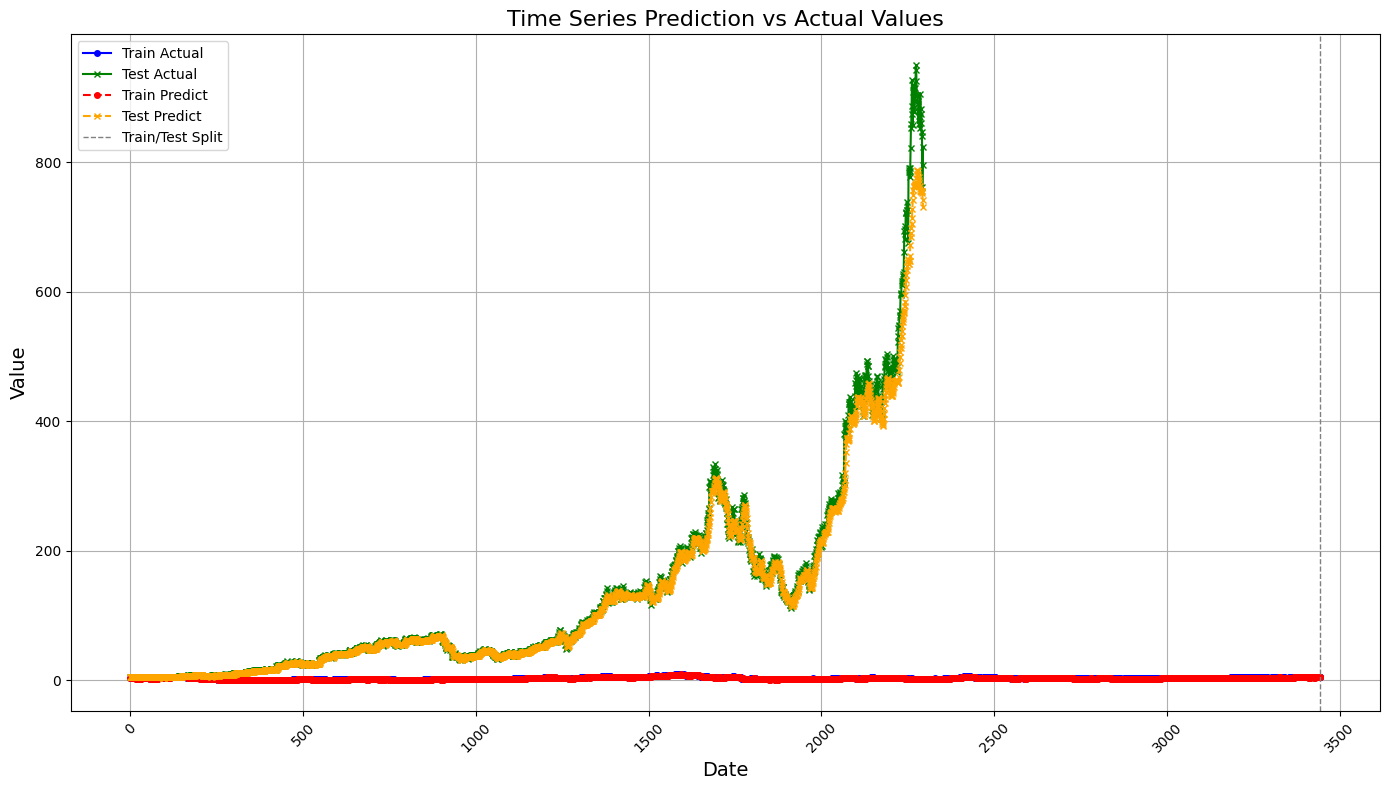

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))


# Plot actual values
plt.plot(train_index, y_train_actual, label='Train Actual', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(test_index, y_test_actual, label='Test Actual', color='green', linestyle='-', marker='x', markersize=4)

# Plot predictions
plt.plot(train_index, train_predict, label='Train Predict', color='red', linestyle='--', marker='o', markersize=4)
plt.plot(test_index, test_predict, label='Test Predict', color='orange', linestyle='--', marker='x', markersize=4)

# Highlight training and testing periods
plt.axvline(x=train_index[-1], color='gray', linestyle='--', linewidth=1, label='Train/Test Split')

# Add grid
plt.grid(True)

# Add titles and labels
plt.title('Time Series Prediction vs Actual Values', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

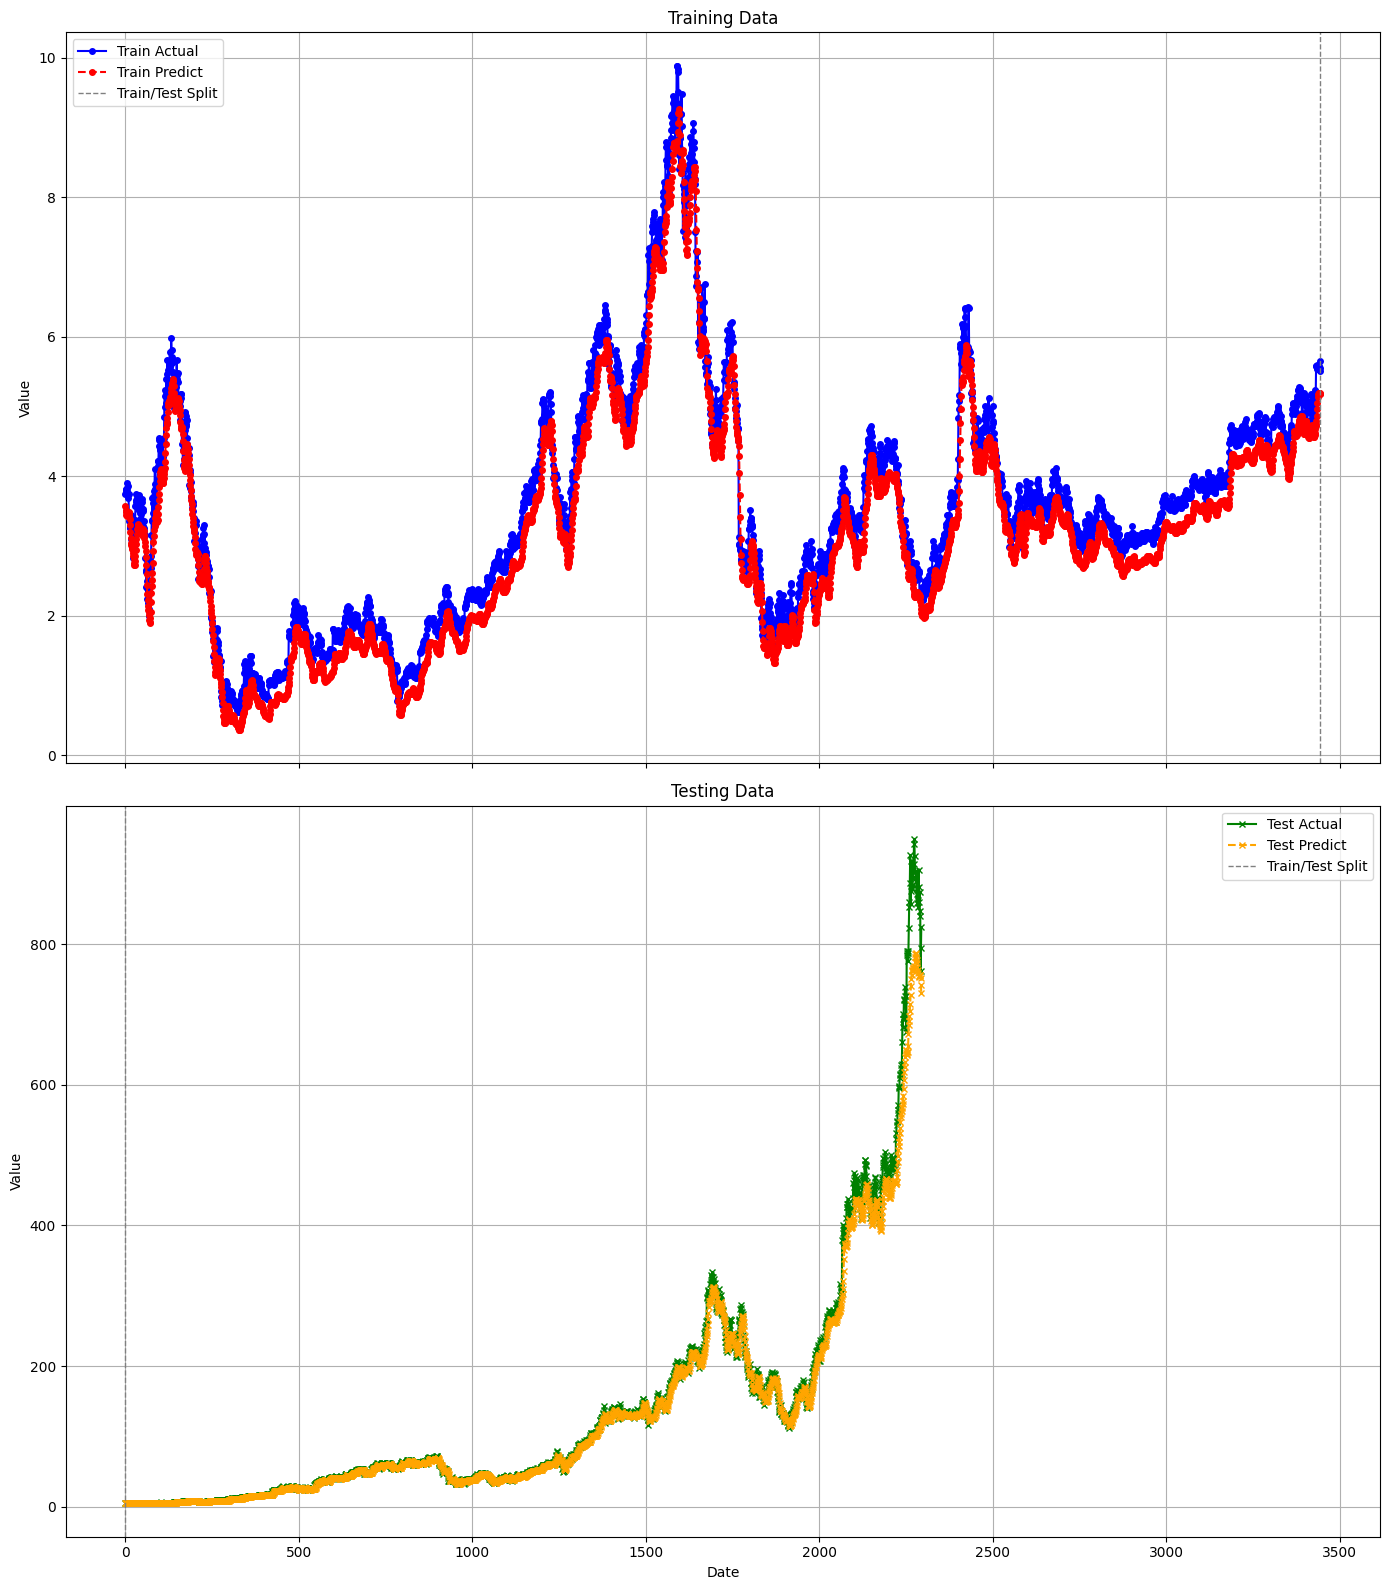

In [267]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

# Plot for Training Data
axs[0].plot(train_index, y_train_actual, label='Train Actual', color='blue', linestyle='-', marker='o', markersize=4)
axs[0].plot(train_index, train_predict, label='Train Predict', color='red', linestyle='--', marker='o', markersize=4)
axs[0].axvline(x=train_index[-1], color='gray', linestyle='--', linewidth=1, label='Train/Test Split')
axs[0].grid(True)
axs[0].set_title('Training Data')
axs[0].set_ylabel('Value')
axs[0].legend()


# Plot for Testing Data
axs[1].plot(test_index, y_test_actual, label='Test Actual', color='green', linestyle='-', marker='x', markersize=4)
axs[1].plot(test_index, test_predict, label='Test Predict', color='orange', linestyle='--', marker='x', markersize=4)
axs[1].axvline(x=test_index[0], color='gray', linestyle='--', linewidth=1, label='Train/Test Split')
axs[1].grid(True)
axs[1].set_title('Testing Data')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Value')
axs[1].legend()


# Adjust layout to prevent overlap
plt.tight_layout()

** Final Profit Calculation: Combining Evaly's Business Profits with Nvidia Stock Investments**

In [268]:
# Total Revenue in USD: 528,008,953,199,795,026,318.99 USD

# Calculated Evaly's total liquid profit after 3 years
evaly_total_profit = 528008953199795026318.99  # Replace this value with Revenue of Evaly for past 3 years

# Predict Nvidia stock prices for the next year using your trained LSTM model
predicted_prices = model.predict(X_test)

# Calculate the investment growth
initial_stock_price = predicted_prices[0][0]
final_stock_price = predicted_prices[-1][0]
growth_factor = final_stock_price / initial_stock_price

# Calculate the final profit after investing in Nvidia stocks
final_investment_value = evaly_total_profit * growth_factor

# Output the final profit
print(f"Evaly's final profit after investing in Nvidia stocks: ${final_investment_value:.2f}")


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaly's final profit after investing in Nvidia stocks: $82310002137354834280448.00


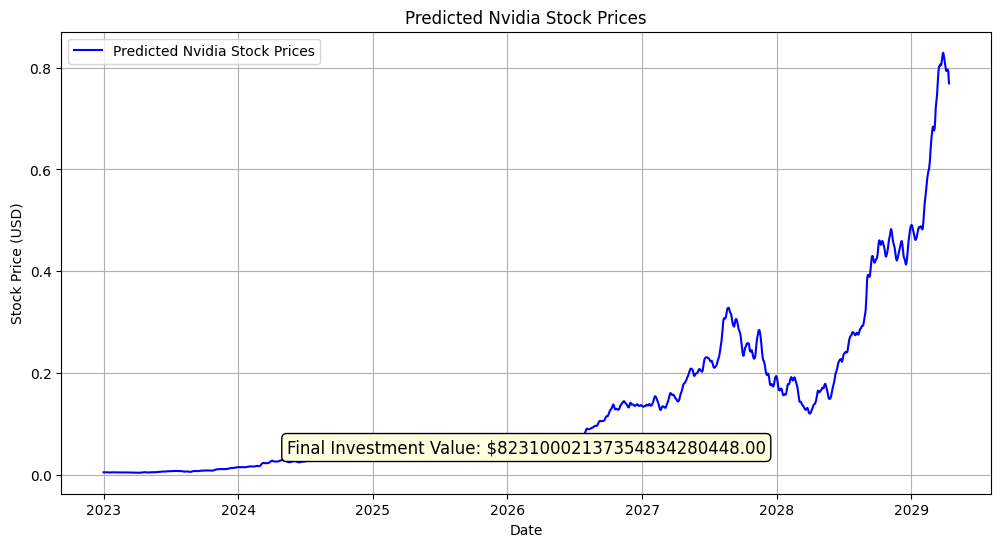

In [269]:
# Generate a list of dates for the x-axis
dates = pd.date_range(start='2023-01-01', periods=len(predicted_prices), freq='D')

# Plot the predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(dates, predicted_prices, label='Predicted Nvidia Stock Prices', color='b')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Predicted Nvidia Stock Prices')
plt.legend()
plt.grid(True)

# Annotate the final investment value on the plot
plt.annotate(f'Final Investment Value: ${final_investment_value:.2f}',
             xy=(0.5, 0.1), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightyellow'))

# Show the plot
plt.show()


Historical Growth Factor: 222.27
Predicted Growth Factor: 155.89


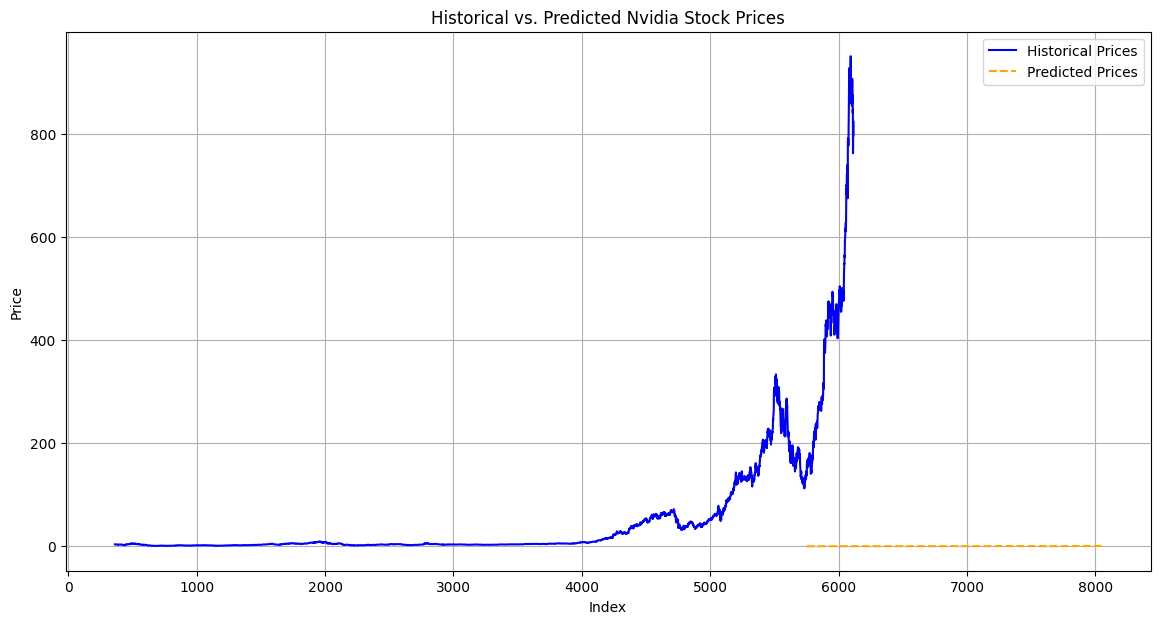

In [270]:
# Extract the historical stock prices from 'Adj Close'
historical_prices = df['Adj Close']

# Calculate the initial and final stock prices
initial_stock_price_historical = historical_prices.iloc[0]
final_stock_price_historical = historical_prices.iloc[-1]

# Calculate historical growth factor
historical_growth_factor = final_stock_price_historical / initial_stock_price_historical
print(f"Historical Growth Factor: {historical_growth_factor:.2f}")

# Convert predicted prices to a Pandas Series for comparison
predicted_prices = np.array(predicted_prices).flatten()
predicted_prices_series = pd.Series(predicted_prices, name='Predicted Prices')

# Generate corresponding indices for predictions
predicted_indices = range(len(df), len(df) + len(predicted_prices))
predicted_prices_series.index = predicted_indices

# Extract initial and final predicted stock prices
initial_stock_price_predicted = predicted_prices_series.iloc[0]
final_stock_price_predicted = predicted_prices_series.iloc[-1]

# Calculate predicted growth factor
predicted_growth_factor = final_stock_price_predicted / initial_stock_price_predicted
print(f"Predicted Growth Factor: {predicted_growth_factor:.2f}")

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close'], label='Historical Prices', color='blue')
plt.plot(predicted_prices_series.index, predicted_prices_series, label='Predicted Prices', color='orange', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Historical vs. Predicted Nvidia Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


**Residual Analysis**

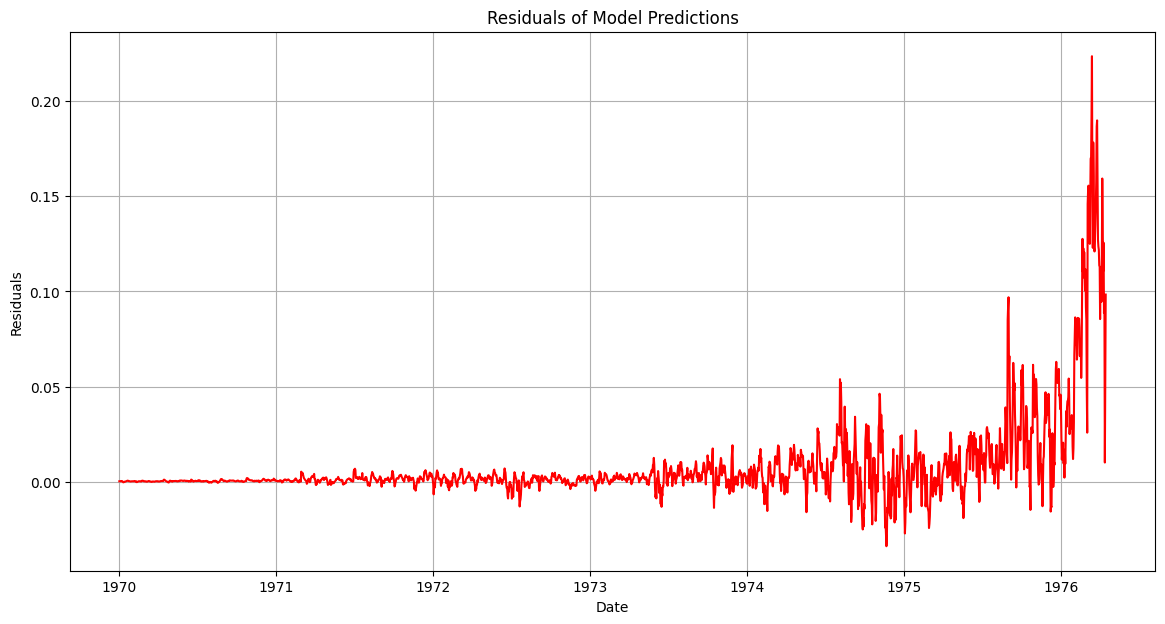

In [271]:
# Calculate residuals
residuals = y_test.flatten() - predicted_prices.flatten()

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(predicted_dates, residuals, color='red')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of Model Predictions')
plt.grid(True)
plt.show()


**Error Metrics Calculation**

In [272]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R2 Score
mae = mean_absolute_error(y_test, predicted_prices)
mse = mean_squared_error(y_test, predicted_prices)
r2 = r2_score(y_test, predicted_prices)

print(f"Test MAE: {mae:.2f}")
print(f"Test MSE: {mse:.2f}")
print(f"Test R2 Score: {r2:.2f}")


Test MAE: 0.01
Test MSE: 0.00
Test R2 Score: 0.98


**Plot Prediction vs Actual Values**

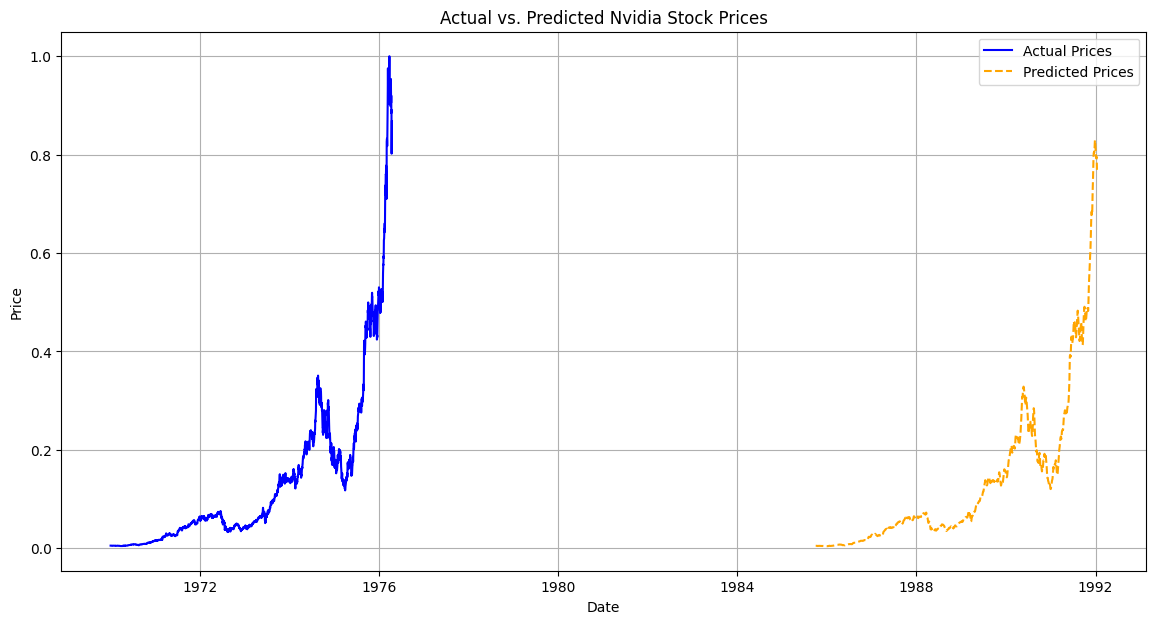

In [273]:
# Convert y_test to a Pandas Series for easier plotting
y_test_series = pd.Series(y_test.flatten(), name='Actual Prices', index=predicted_dates)

# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_series.index, y_test_series, label='Actual Prices', color='blue')
plt.plot(predicted_prices_series.index, predicted_prices_series, label='Predicted Prices', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Nvidia Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


**Model Diagnostic**

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3426e-07 - val_loss: 9.6393e-08
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.4138e-08 - val_loss: 3.5543e-08
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2166e-08 - val_loss: 2.1944e-08
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.1155e-08 - val_loss: 3.9513e-08
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6353e-08 - val_loss: 6.1126e-08


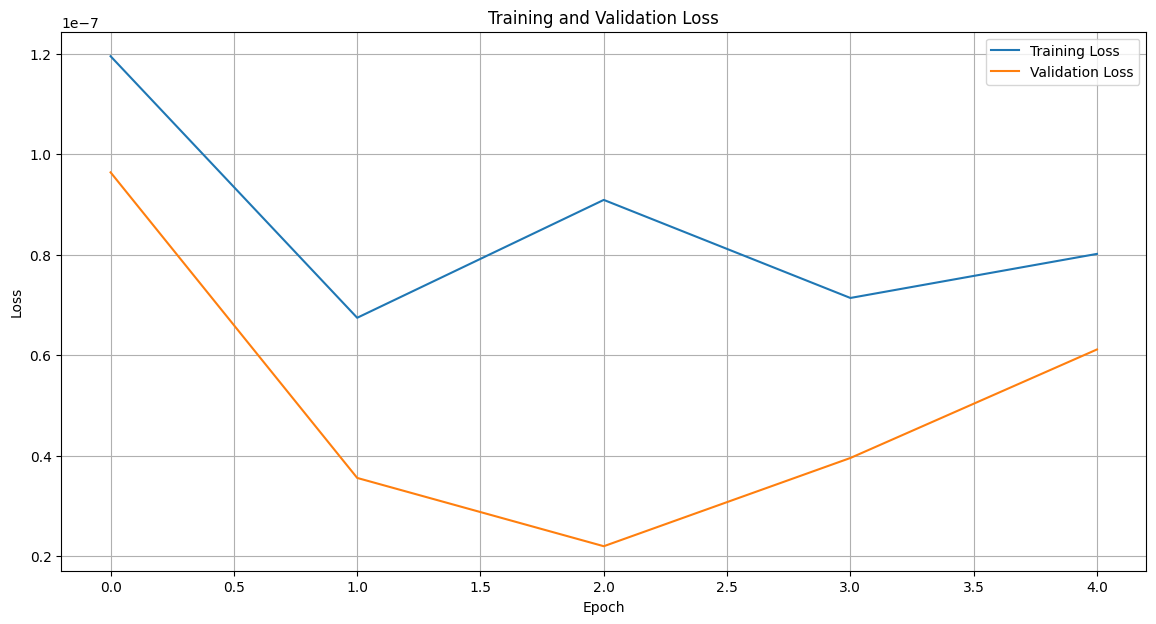

In [274]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64, callbacks=[early_stopping])

# Plot training and validation loss
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
